# Business Financial Report

![alt](report.jpg)

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

## Project Instruction

To successfully complete the project for your manager, please compute two ratios:

A debt-to-equity ratio or an equity multiplier ratio. Save this ratio in a column named "leverage_ratio" in a DataFrame called df_ratios.

A gross margin ratio or an operating margin ratio. Save this ratio in a column named "profitability_ratio", in a DataFrame called df_ratios.

The datasets provided to you have information on the type of industry a company belongs to in a column called comp_type. Your manager also needs you to answer these three questions:

Which company type (comp_type) has the lowest profitability ratio? Save this comp_type value as a string in a variable called lowest_profitability.

Which company type has the highest leverage ratio? Save this comp_type value as a string in a variable called highest_leverage.

What is the relationship between leverage and profitability in the real estate companies represented in this data? Is it "positive," "negative," or "no relationship?" Save one of these three strings in a variable called relationship.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_bs = pd.read_excel('data/Balance_Sheet.xlsx')

df_bs.head()




,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [2]:
df_is = pd.read_excel('data/Income_Statement.xlsx')
df_is.head()

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [3]:

df_ratios = pd.merge(df_bs, df_is, on=['Year', 'comp_type', 'company'])


df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000


## General Overview


In [18]:
print("Number of rows and columns:", df_ratios.shape)



Number of rows and columns: (60, 22)

Data Types:
 Unnamed: 0_x                   int64
Year                           int64
comp_type                     object
company                       object
Accounts Payable               int64
Cash                           int64
Inventory                    float64
Property Plant Equipment       int64
Short Term Investments       float64
Total Assets                   int64
Total Current Assets           int64
Total Current Liabilities      int64
Total Liab                     int64
Total Stockholder Equity       int64
Unnamed: 0_y                   int64
Cost Of Goods Sold             int64
Gross Profit                   int64
Operating Income               int64
Total Operating Expenses       int64
Total Revenue                  int64
profitability_ratio          float64
leverage_ratio               float64
dtype: object

Missing Values:
 Unnamed: 0_x                  0
Year                          0
comp_type                     0
company

In [19]:
print("\nData Types:\n", df_ratios.dtypes)



Data Types:
 Unnamed: 0_x                   int64
Year                           int64
comp_type                     object
company                       object
Accounts Payable               int64
Cash                           int64
Inventory                    float64
Property Plant Equipment       int64
Short Term Investments       float64
Total Assets                   int64
Total Current Assets           int64
Total Current Liabilities      int64
Total Liab                     int64
Total Stockholder Equity       int64
Unnamed: 0_y                   int64
Cost Of Goods Sold             int64
Gross Profit                   int64
Operating Income               int64
Total Operating Expenses       int64
Total Revenue                  int64
profitability_ratio          float64
leverage_ratio               float64
dtype: object


In [20]:
print("\nMissing Values:\n", df_ratios.isnull().sum())


Missing Values:
 Unnamed: 0_x                  0
Year                          0
comp_type                     0
company                       0
Accounts Payable              0
Cash                          0
Inventory                    16
Property Plant Equipment      0
Short Term Investments       23
Total Assets                  0
Total Current Assets          0
Total Current Liabilities     0
Total Liab                    0
Total Stockholder Equity      0
Unnamed: 0_y                  0
Cost Of Goods Sold            0
Gross Profit                  0
Operating Income              0
Total Operating Expenses      0
Total Revenue                 0
profitability_ratio           0
leverage_ratio                0
dtype: int64


In [28]:
df_ratios = df_ratios.dropna()

In [29]:
print("\nMissing Values:\n", df_ratios.isnull().sum())


Missing Values:
 Unnamed: 0_x                 0
Year                         0
comp_type                    0
company                      0
Accounts Payable             0
Cash                         0
Inventory                    0
Property Plant Equipment     0
Short Term Investments       0
Total Assets                 0
Total Current Assets         0
Total Current Liabilities    0
Total Liab                   0
Total Stockholder Equity     0
Unnamed: 0_y                 0
Cost Of Goods Sold           0
Gross Profit                 0
Operating Income             0
Total Operating Expenses     0
Total Revenue                0
profitability_ratio          0
leverage_ratio               0
dtype: int64


In [21]:
# Statistical Summary

print("\nStatistical Summary:\n", df_ratios.describe())



Statistical Summary:
        Unnamed: 0_x         Year  Accounts Payable          Cash  \
count     60.000000    60.000000      6.000000e+01  6.000000e+01   
mean      29.500000  2019.700000      1.278497e+10  1.133191e+10   
std       17.464249     1.197455      1.834247e+10  1.189219e+10   
min        0.000000  2018.000000      1.308000e+08  1.390000e+08   
25%       14.750000  2019.000000      1.319056e+09  1.932175e+09   
50%       29.500000  2020.000000      7.613000e+09  7.341500e+09   
75%       44.250000  2021.000000      1.321375e+10  1.628600e+10   
max       59.000000  2022.000000      7.866400e+10  4.884400e+10   

          Inventory  Property Plant Equipment  Short Term Investments  \
count  4.400000e+01              6.000000e+01            3.700000e+01   
mean   6.332750e+09              4.972535e+10            3.660700e+10   
std    6.545483e+09              5.296948e+10            4.261226e+10   
min    3.890000e+08              9.598000e+09            2.290000e+08   

In [22]:
# Frequency Distribution for Categorical Columns
print("\nCompany Types:\n", df_ratios['comp_type'].value_counts())
print("\nYears:\n", df_ratios['Year'].value_counts())
print("\nCompanies:\n", df_ratios['company'].value_counts())



Company Types:
 comp_type
tech        20
real_est    20
fmcg        20
Name: count, dtype: int64

Years:
 Year
2019    15
2020    15
2021    15
2018    12
2022     3
Name: count, dtype: int64

Companies:
 company
AAPL     4
MSFT     4
GOOG     4
AMZN     4
META     4
BAM      4
AMT      4
CCI      4
SPG      4
WY       4
NSRGY    4
PG       4
PEP      4
UL       4
KO       4
Name: count, dtype: int64


In [4]:
# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]


In [5]:
# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]


In [6]:
# Compute equity multiplier ratio, but commenting it out
# df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062


In [7]:
# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448


In [23]:

# Unique Value Analysis
print("\nUnique Values in Each Column:\n", df_ratios.nunique())



Unique Values in Each Column:
 Unnamed: 0_x                 60
Year                          5
comp_type                     3
company                      15
Accounts Payable             59
Cash                         60
Inventory                    44
Property Plant Equipment     60
Short Term Investments       37
Total Assets                 60
Total Current Assets         60
Total Current Liabilities    60
Total Liab                   60
Total Stockholder Equity     60
Unnamed: 0_y                 60
Cost Of Goods Sold           60
Gross Profit                 60
Operating Income             60
Total Operating Expenses     60
Total Revenue                60
profitability_ratio          60
leverage_ratio               60
dtype: int64


# Visual Analysis

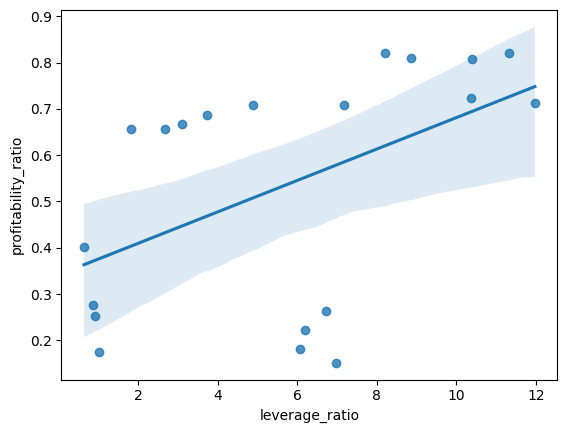

In [8]:
# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"

In [10]:
df_ratios.columns

Index(['Unnamed: 0_x', 'Year', 'comp_type', 'company', 'Accounts Payable',
       'Cash', 'Inventory', 'Property Plant Equipment',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity',
       'Unnamed: 0_y', 'Cost Of Goods Sold', 'Gross Profit',
       'Operating Income', 'Total Operating Expenses', 'Total Revenue',
       'profitability_ratio', 'leverage_ratio'],
      dtype='object')

Number of rows and columns: (60, 22)

Data Types:
 Unnamed: 0_x                   int64
Year                           int64
comp_type                     object
company                       object
Accounts Payable               int64
Cash                           int64
Inventory                    float64
Property Plant Equipment       int64
Short Term Investments       float64
Total Assets                   int64
Total Current Assets           int64
Total Current Liabilities      int64
Total Liab                     int64
Total Stockholder Equity       int64
Unnamed: 0_y                   int64
Cost Of Goods Sold             int64
Gross Profit                   int64
Operating Income               int64
Total Operating Expenses       int64
Total Revenue                  int64
profitability_ratio          float64
leverage_ratio               float64
dtype: object

Missing Values:
 Unnamed: 0_x                  0
Year                          0
comp_type                     0
company

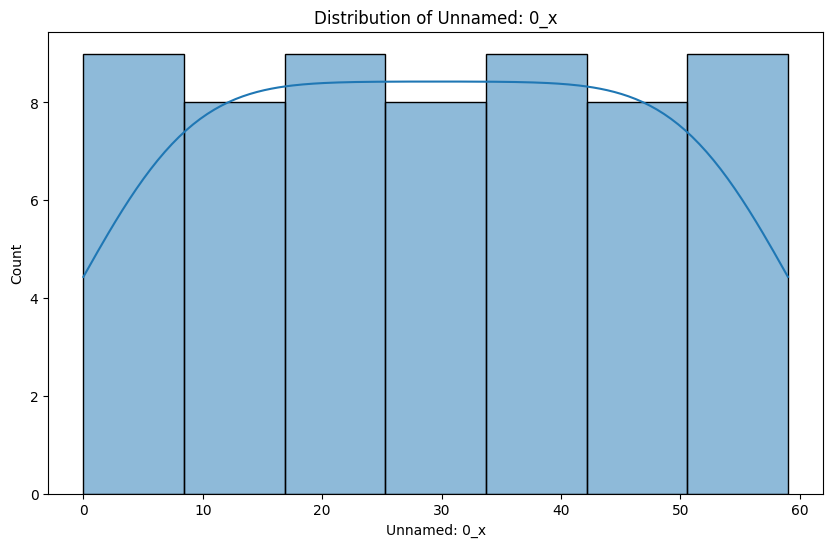

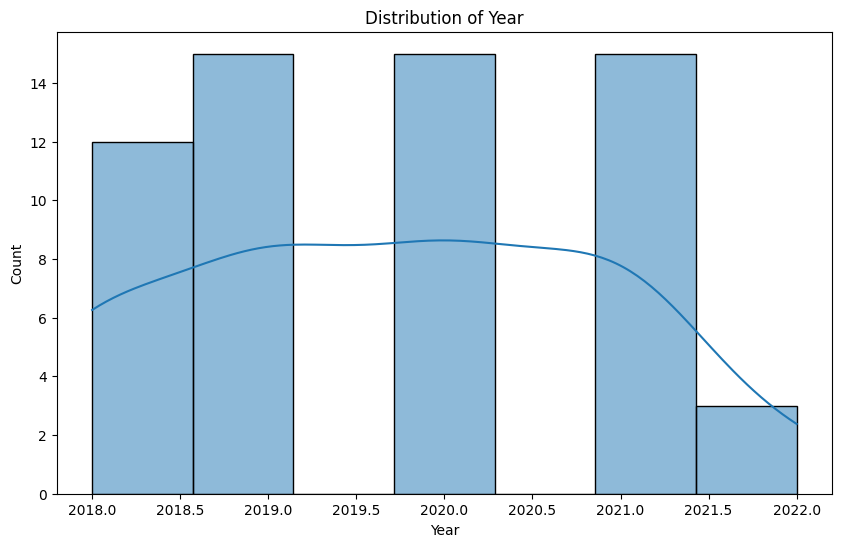

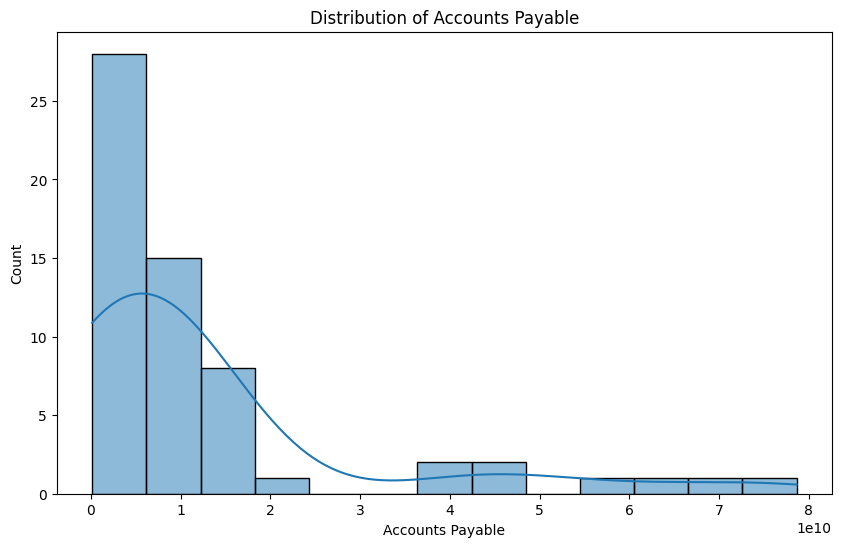

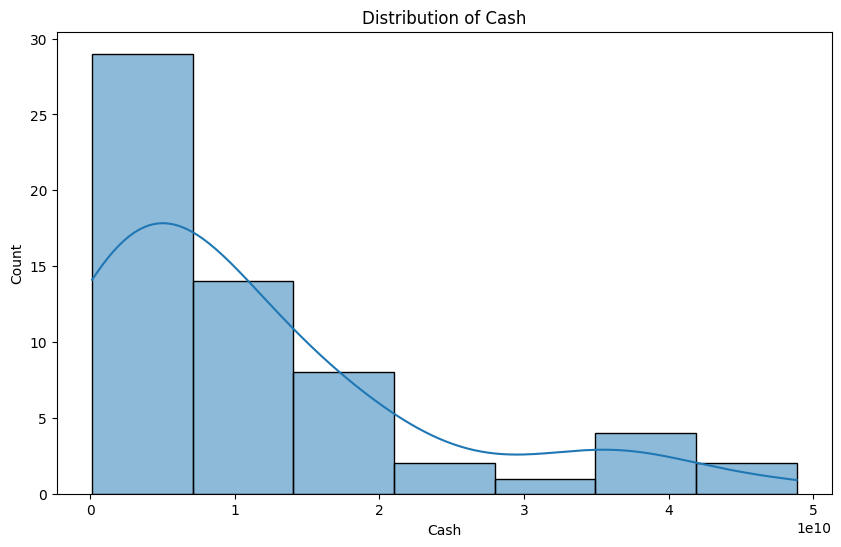

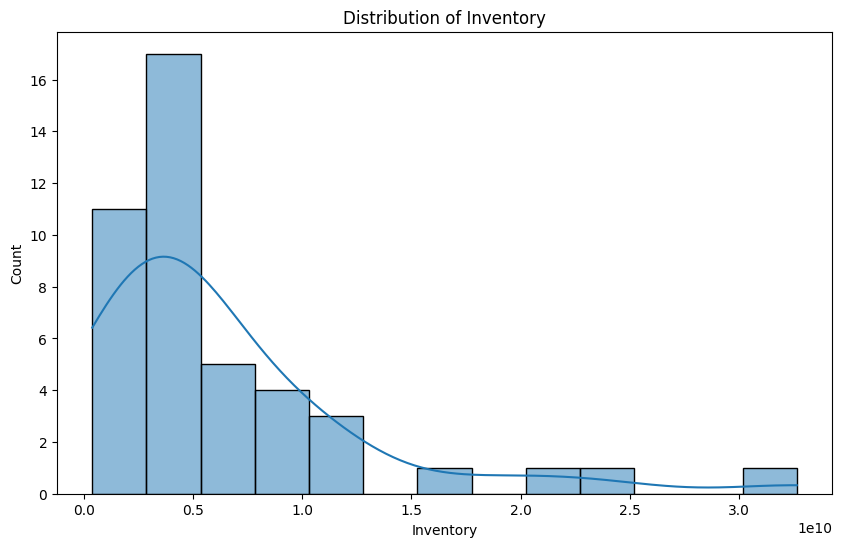

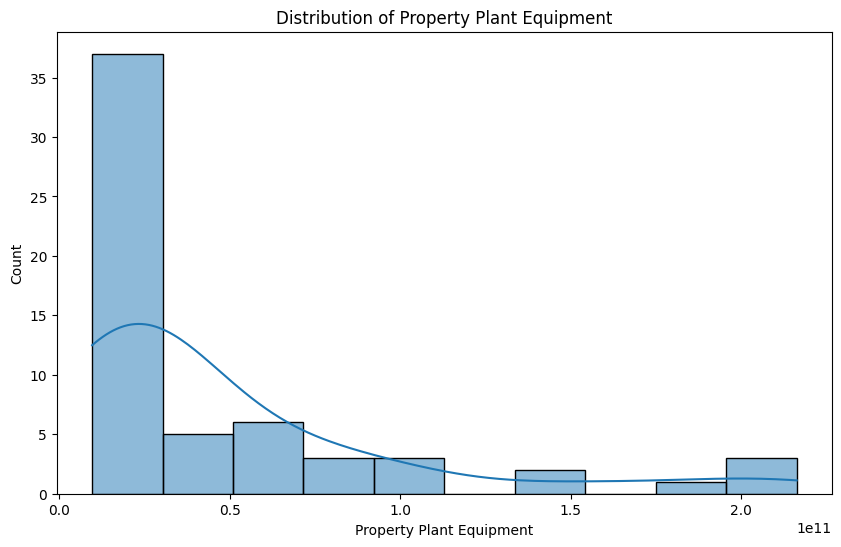

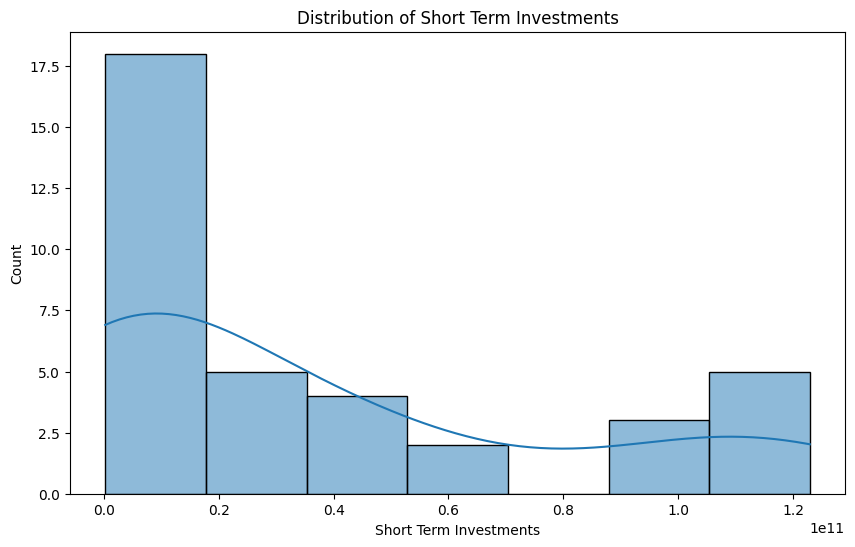

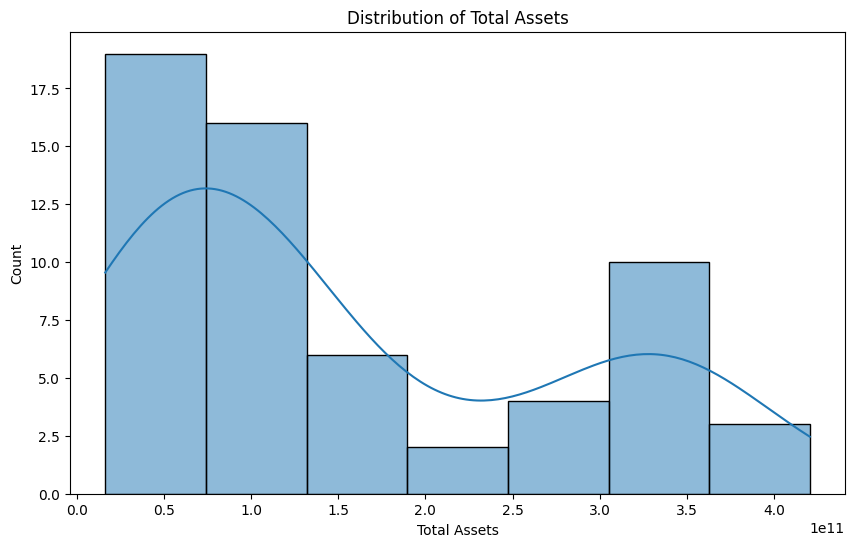

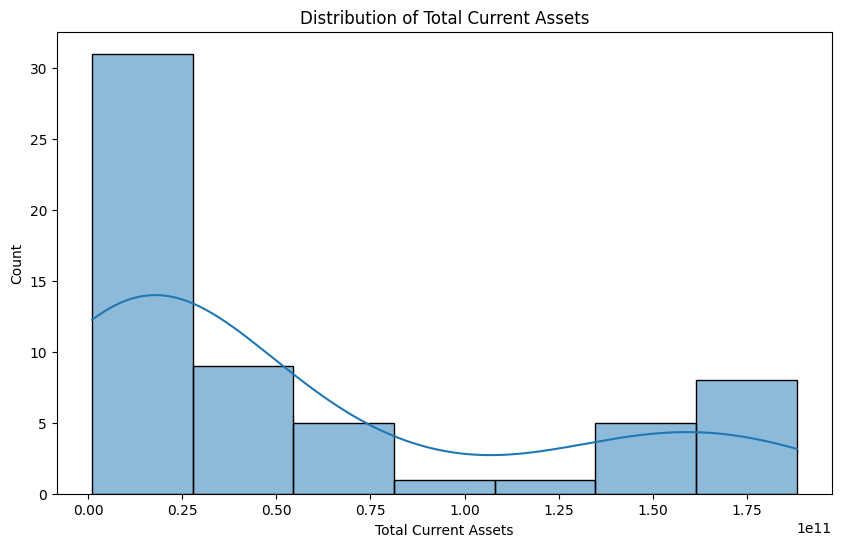

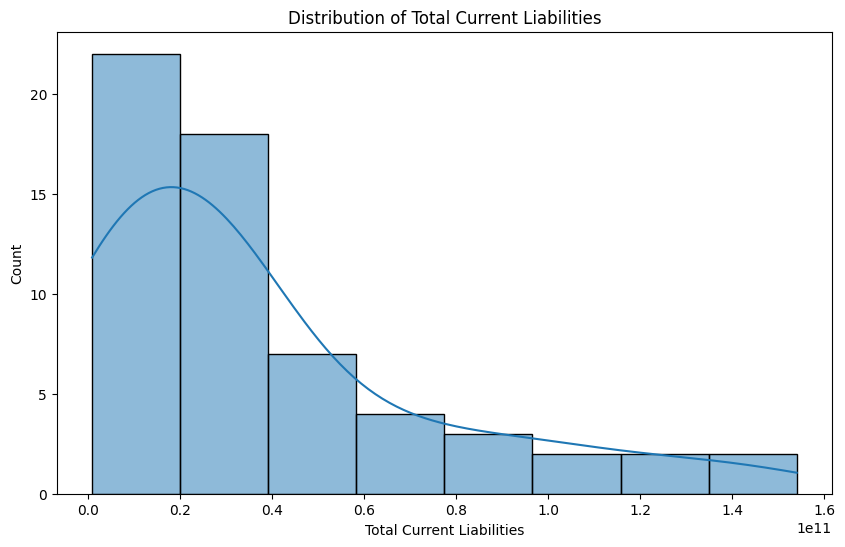

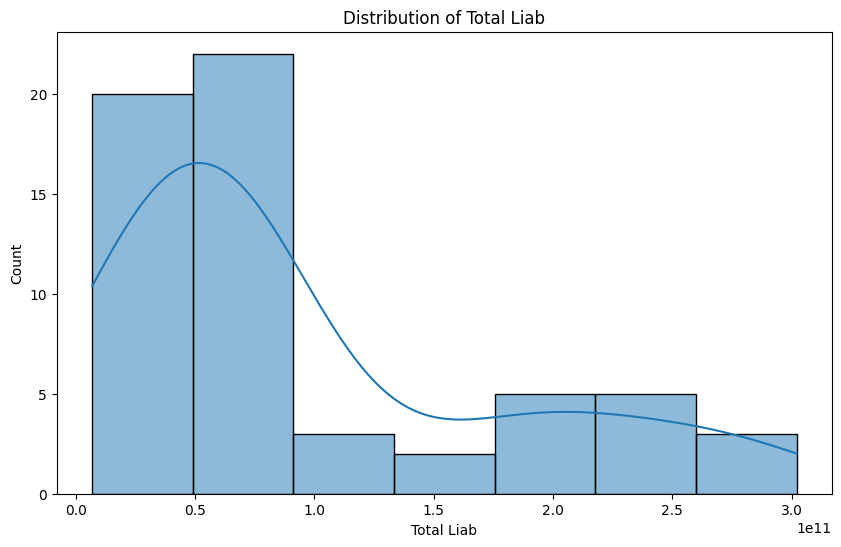

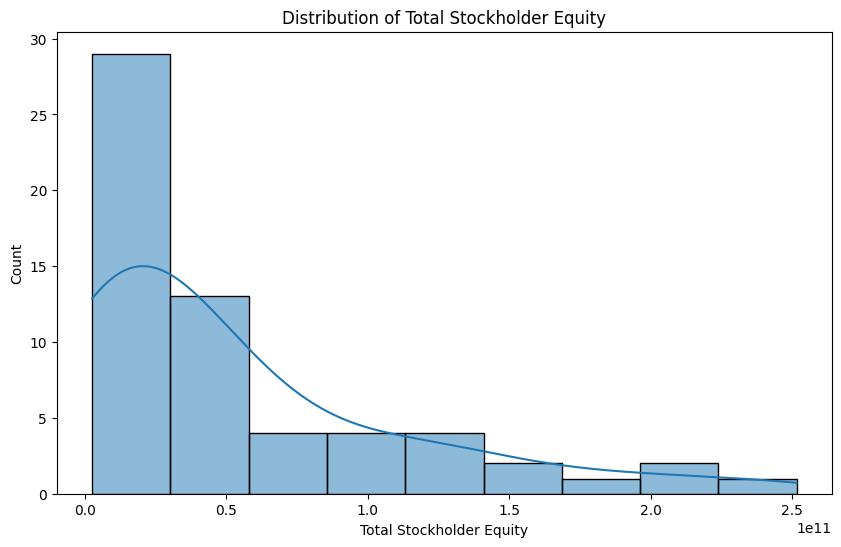

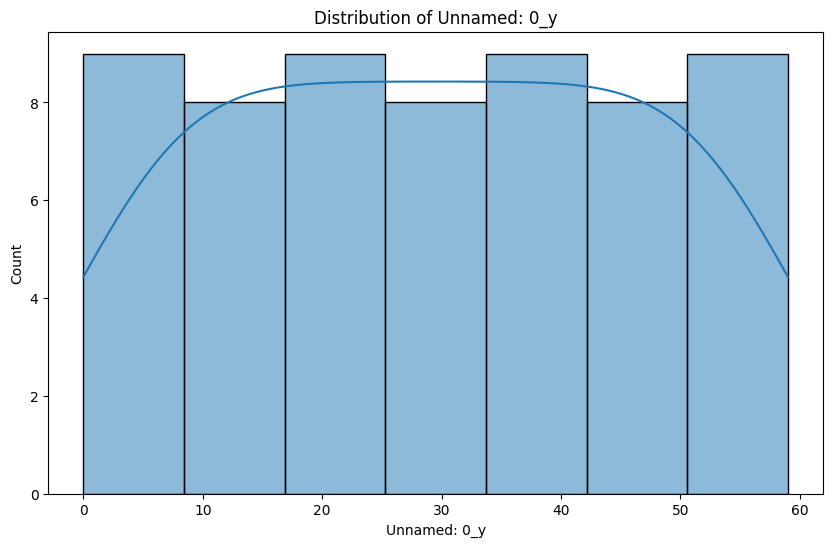

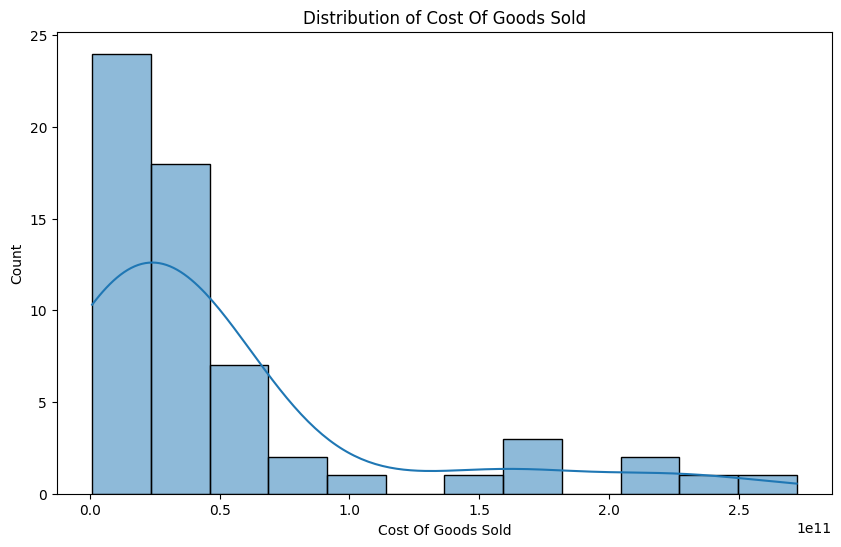

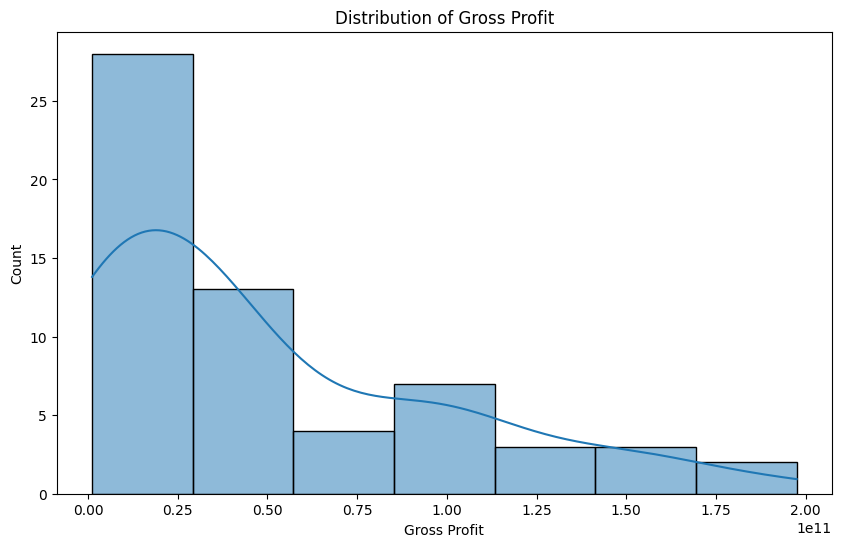

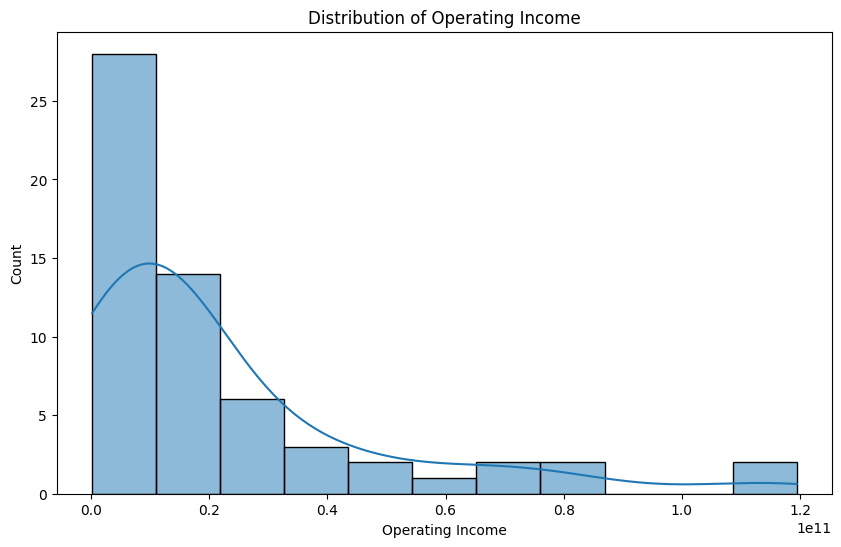

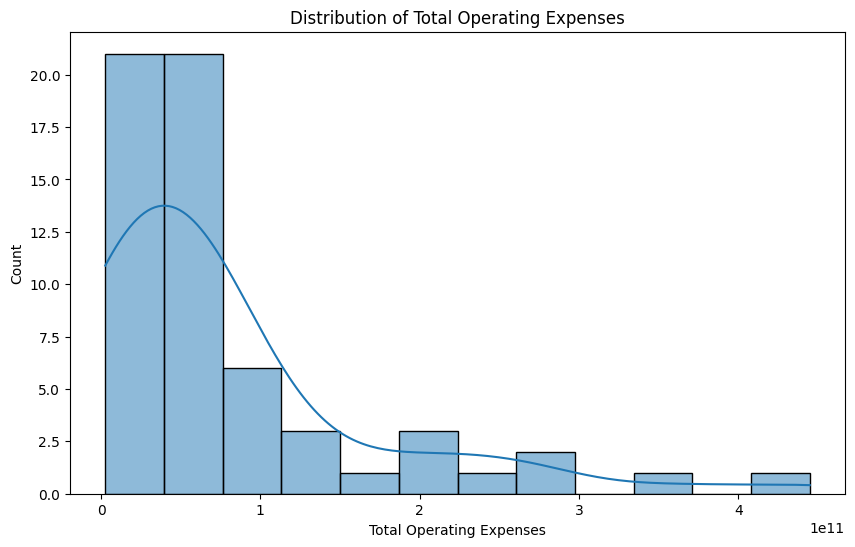

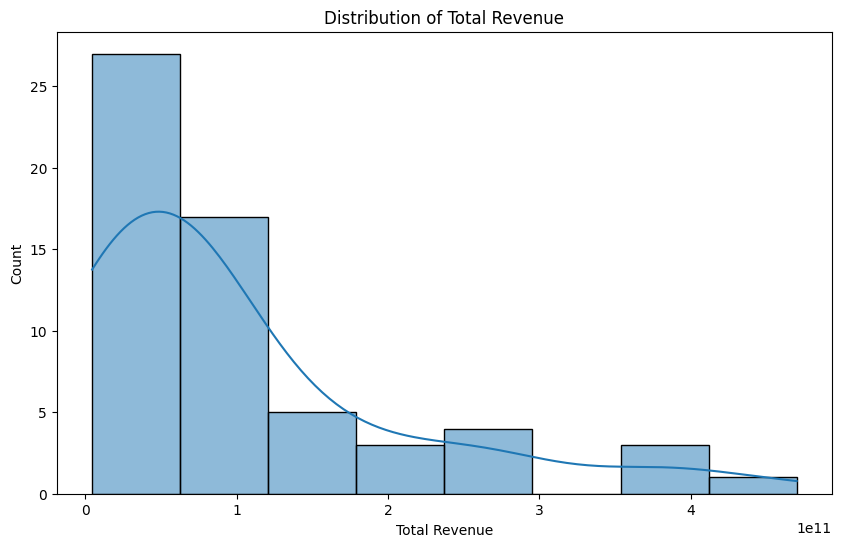

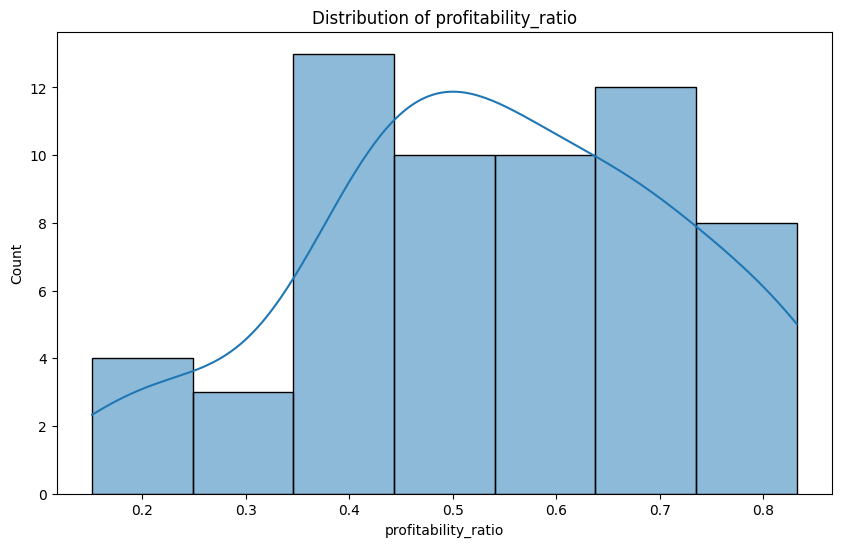

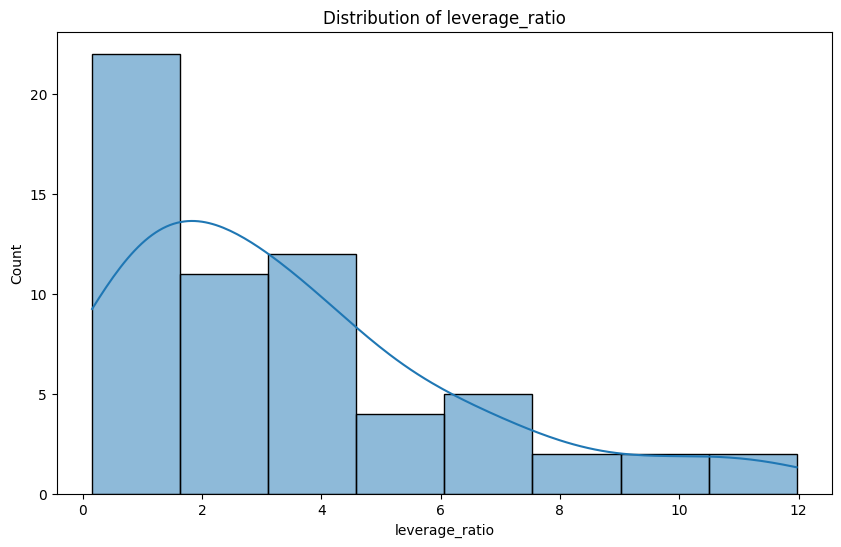

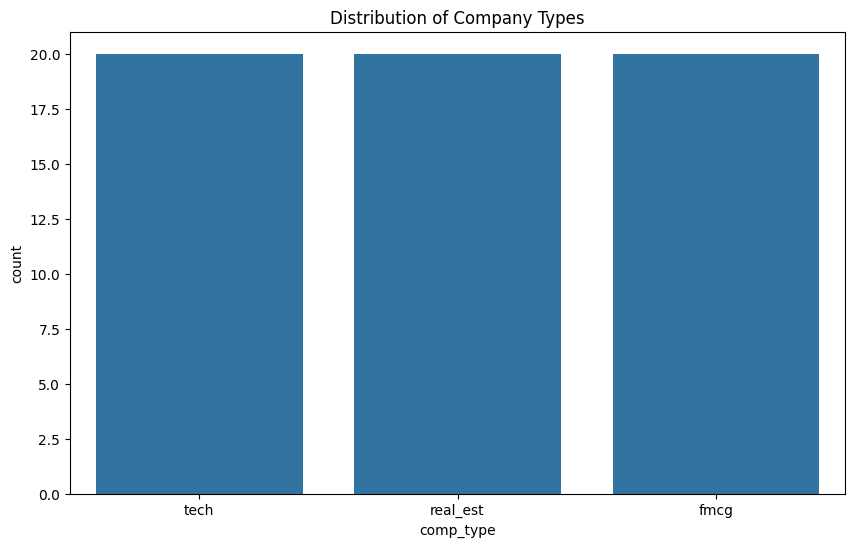

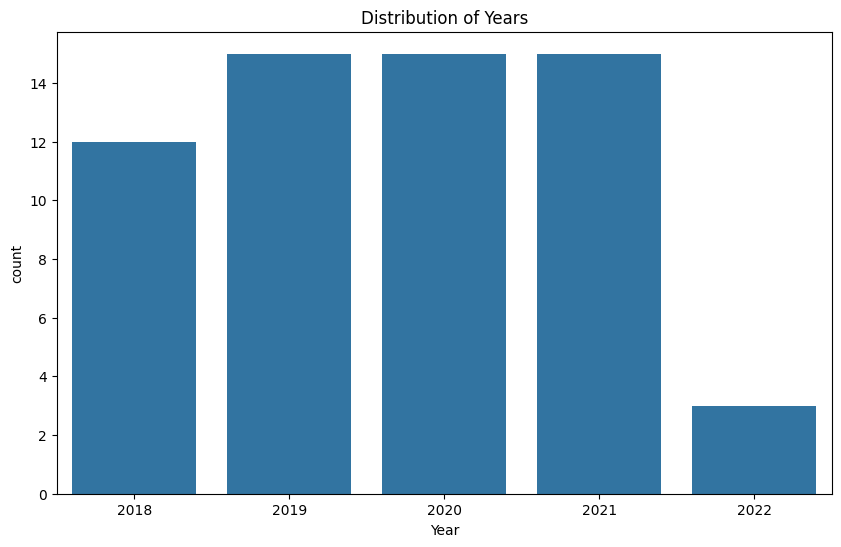

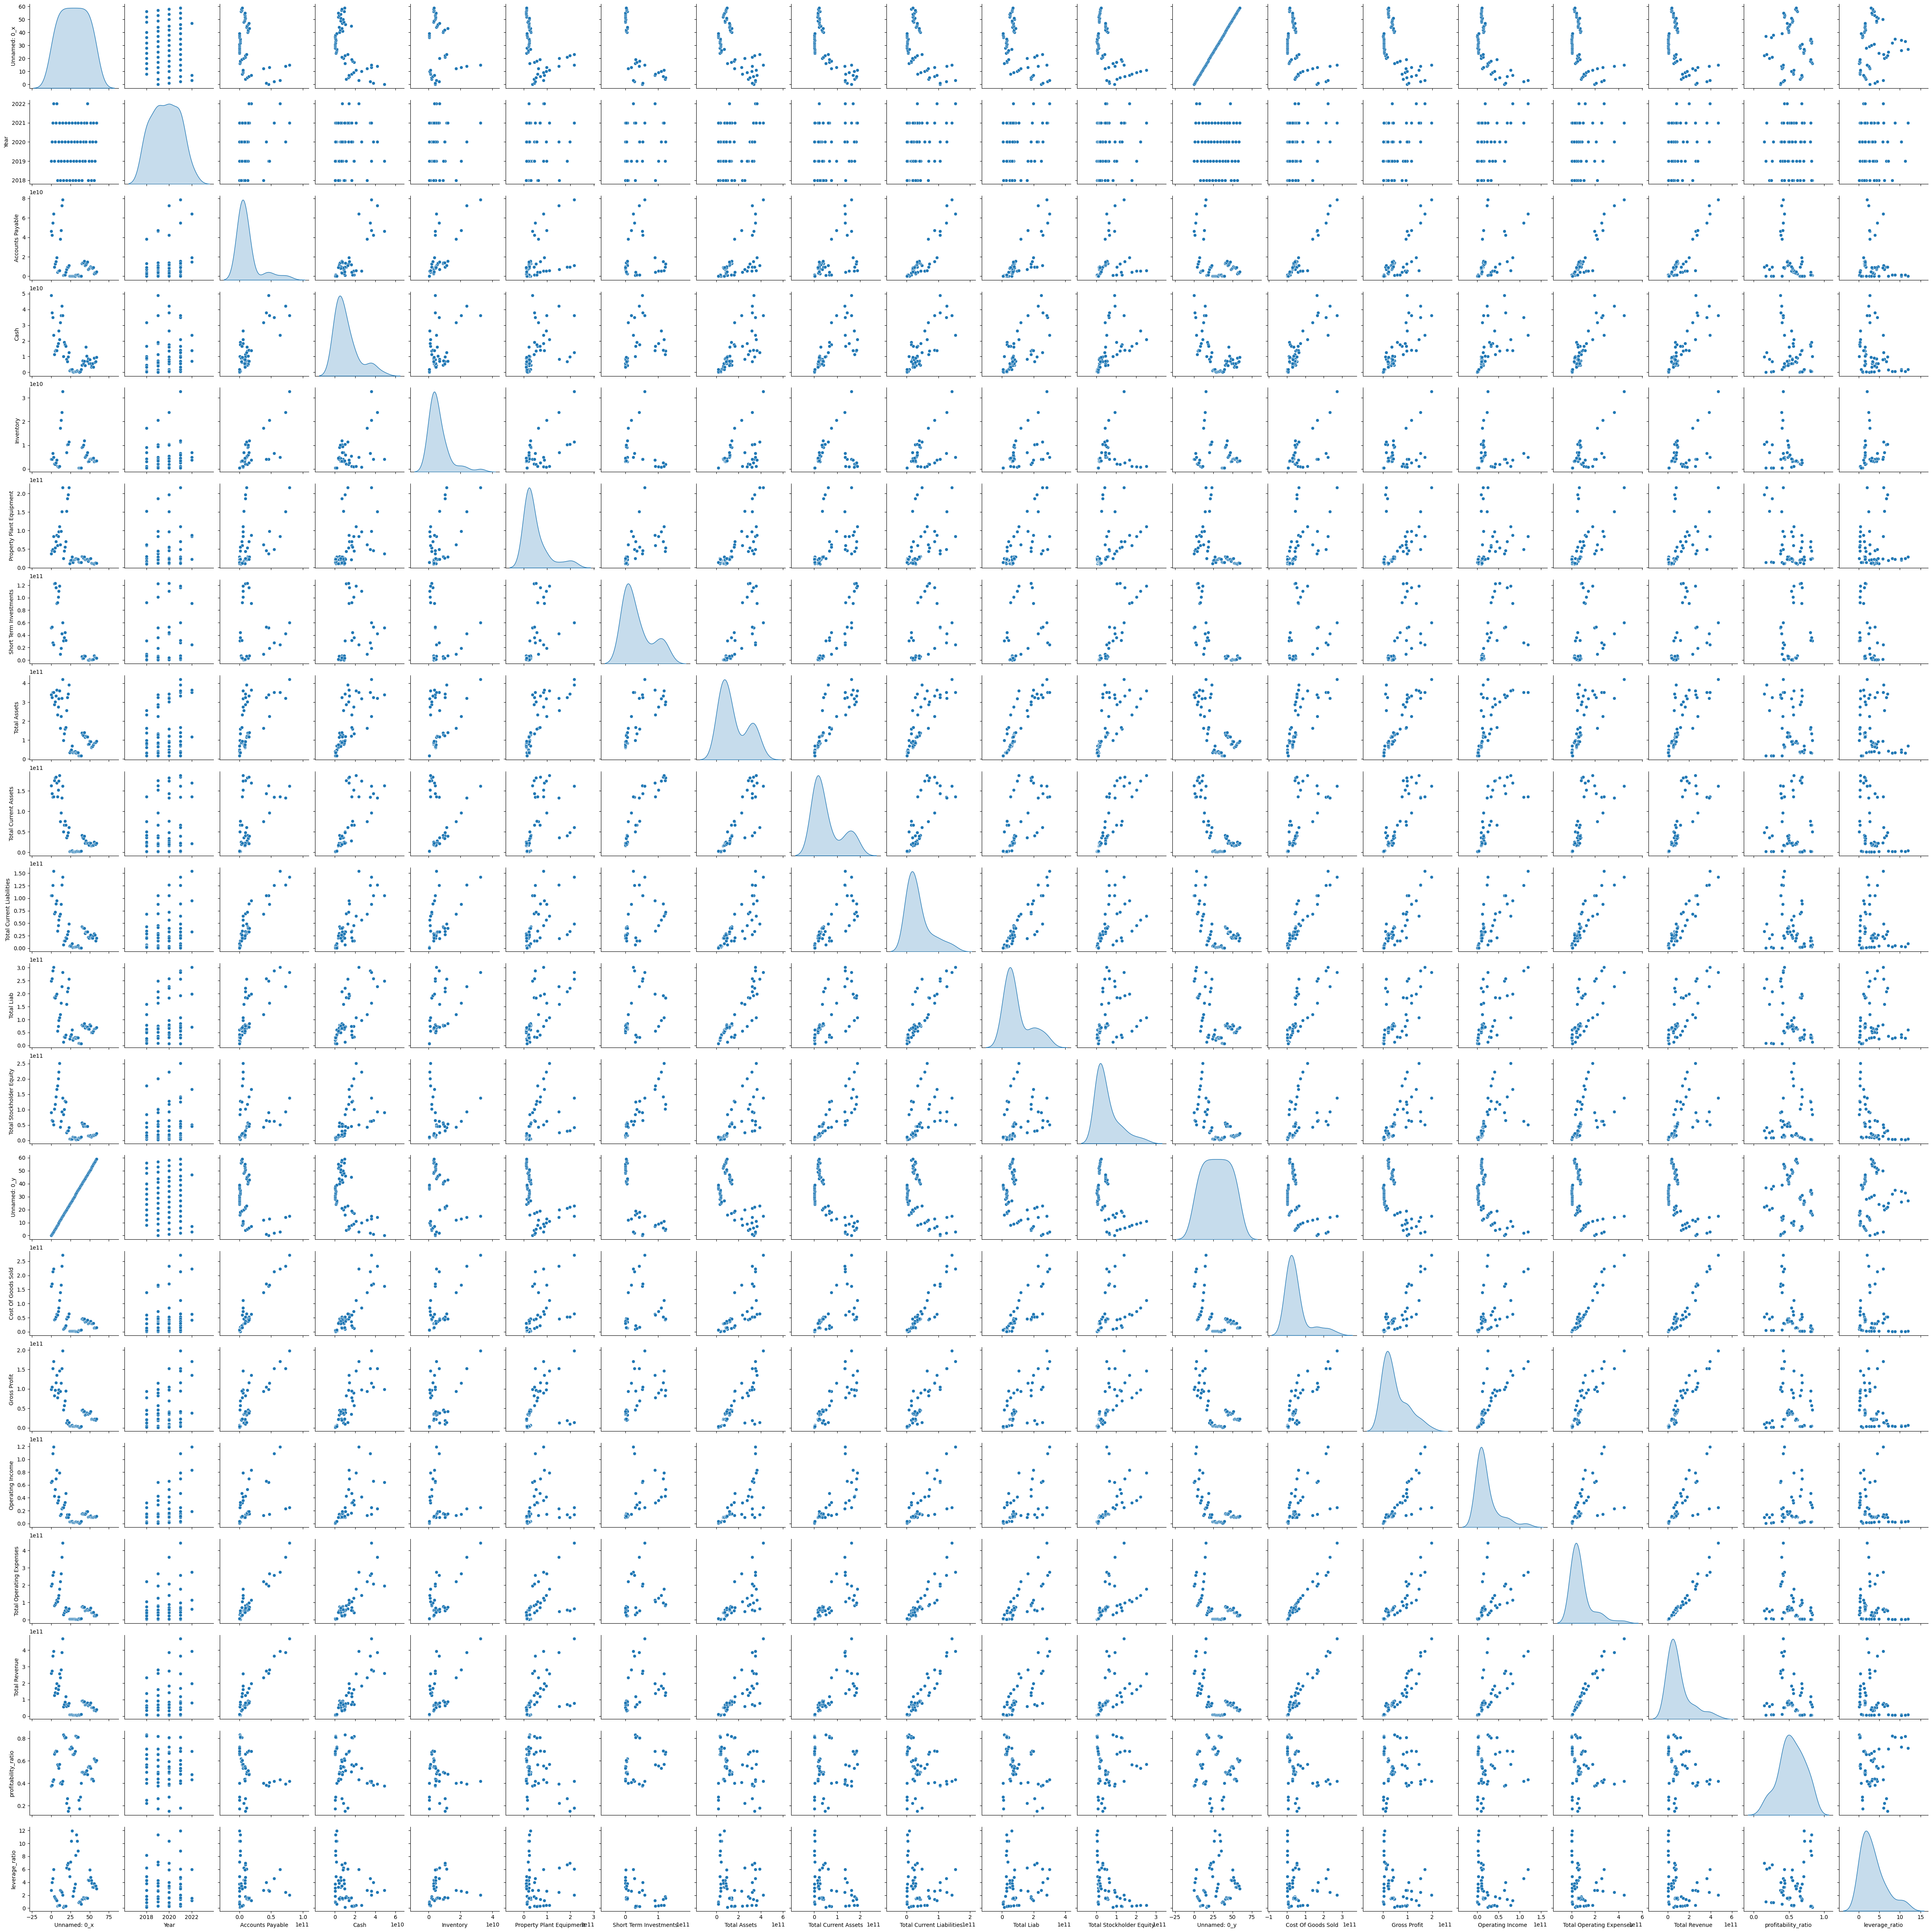

In [17]:

# Distribution Plots
numerical_columns = df_ratios.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_ratios[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count Plots
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ratios, x='comp_type')
plt.title('Distribution of Company Types')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_ratios, x='Year')
plt.title('Distribution of Years')
plt.show()

# Correlation Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

# Pair Plots
sns.pairplot(df_ratios, diag_kind='kde')
plt.show()

# Recommendations
# Analyze the results from the descriptive summary and visualizations
# Identify any patterns, anomalies, or areas of interest
# Provide actionable insights based on the analysis